# HR Employee Attrition and Performance (Simulated) Dataset

Source:  
https://www.ibm.com/communities/analytics/watson-analytics-blog/hr-employee-attrition/
  
  
Sections:  
* [Reading in data and early data exploration](#Reading-in-data-and-early-data-exploration)
* [Preprocessing, Exploratory Analysis, and Feature Engineering](#Preprocessing,-Exploratory-Analysis,-and-Feature-Engineering)
* [Modeling](#Modeling)

## Reading in data and early data exploration

In [1]:
#imports
from __future__ import print_function, division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#import datatime

%matplotlib inline

Let's read in the data and see what we're working with:

In [3]:
df = pd.read_excel('../data/HR-data-02.xlsx', sheetname='WA_Fn-UseC_-HR-Employee-Attriti')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
print('Initial number of features:', len(df.columns)-1)
df.columns

Initial number of features: 34


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

The data .xlsx has two tabs. The first tab (the one we read into `df`) is the data and the second tab, 'Data Definitions', explains some of the categorical data. Here's what's listed in the second tab:

Education
* 1 'Below College'
* 2 'College'
* 3 'Bachelor'
* 4 'Master'
* 5 'Doctor'
	
EnvironmentSatisfaction
* 1 'Low'
* 2 'Medium'
* 3 'High'
* 4 'Very High'
	
JobInvolvement
* 1 'Low'
* 2 'Medium'
* 3 'High'
* 4 'Very High'
	
JobSatisfaction
* 1 'Low'
* 2 'Medium'
* 3 'High'
* 4 'Very High'
	
PerformanceRating
* 1 'Low'
* 2 'Good'
* 3 'Excellent'
* 4 'Outstanding'
	
RelationshipSatisfaction
* 1 'Low'
* 2 'Medium'
* 3 'High'
* 4 'Very High'
	
WorkLifeBalance
* 1 'Bad'
* 2 'Good'
* 3 'Better'
* 4 'Best'


In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

It still doesn't explain `DailyRate`, `HourlyRate`, `MonthlyRate` and how it differs from `MonthlyIncome`. I'm not sure if I should include these variables for a stronger model, or remove them for a model that I can better understand how variables relate to `Attrition`.

Trying to get a "daily rate" by multiplying `HourlyRate` by 8 (8 hours/day) doesn't get a similar rate to `DailyRate`.

In [10]:
df['DailyRateFromHourly'] = df['HourlyRate'] * 8
df['Difference'] = df['DailyRateFromHourly'] - df['DailyRate']
print(df['Difference'].sum())
print(df['Difference'].mean())

-404774
-275.356462585034


Similarly, `MonthlyRate` is not the same as `MonthlyIncome`.

In [11]:
df['Difference'] = df['MonthlyIncome'] - df['MonthlyRate']
print(df['Difference'].sum())
print(df['Difference'].mean())

-11480953
-7810.172108843537


In [13]:
df.drop(['Difference','DailyRateFromHourly'], axis=1, inplace=True)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Preprocessing, Exploratory Analysis, and Feature Engineering

Let's look at the target variable, `Attrition`. I'm assuming 'Yes' means they've left, and 'No' means they've stayed. Let's change those to `0` and `1`, respectively.

In [26]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [27]:
def impute_attrition(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0
    else:
        return -1

df['Attrition'] = df['Attrition'].apply(impute_attrition)

In [31]:
print(df['Attrition'].value_counts())
print(df['Attrition'].mean() * 100)

0    1233
1     237
Name: Attrition, dtype: int64
16.122448979591837


So it looks like most of the data here is people who have stayed, so this may just be another 'snapshot' look at a company (as opposed to a more historical record dataset).

Let's look at the other variables...

Age appears to have a work force with an mean age of 36, and a bell curve skewed right. All workers seem to be over 18 years of age, so I'm not sure what the point of the `Over18` variable is. The oldest worker in 60 years of age.

In [15]:
df['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

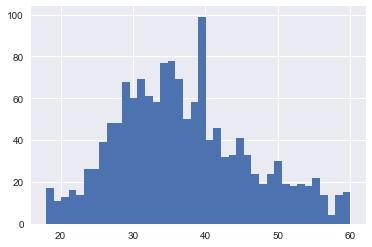

In [24]:
plt.hist(df['Age'], bins=40);

Let's make a feature where we put each person in to an age group (18-19, 20-29, 30-39, etc). We can just leave this as a number. 

In [35]:
df['AgeGroup'] = df['Age'].apply(lambda x: int(str(x)[0]))
print(df['AgeGroup'].describe())
print(df['AgeGroup'].head())

count    1470.000000
mean        3.242857
std         0.960875
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: AgeGroup, dtype: float64
0    4
1    4
2    3
3    3
4    2
Name: AgeGroup, dtype: int64


In [41]:
AttritionAge = pd.crosstab(index=df['Attrition'],columns=df['AgeGroup'])
AttritionAge.index = ['Stayed','Left']
AttritionAge = AttritionAge.T
AttritionAge['StayedPercent'] = (AttritionAge['Stayed'] / 
                                 (AttritionAge['Stayed'] + AttritionAge['Left'])) * 100
AttritionAge

,Stayed,Left,StayedPercent
AgeGroup,,,
1,7,10,41.176471
2,228,81,73.786408
3,533,89,85.691318
4,315,34,90.257880
5,145,23,86.309524
6,5,0,100.000000


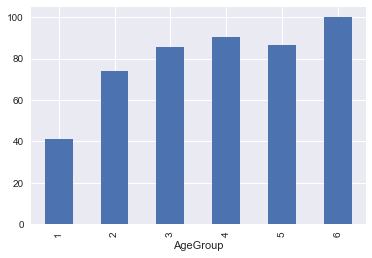

In [43]:
AttritionAge['StayedPercent'].plot.bar();

In [44]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'AgeGroup'],
      dtype='object')

In [45]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

## Modeling